In [8]:
import numpy as np
import pandas as pd
import pymrio
import country_converter as coco

## Read Gloria and Edit

In [9]:
io = pymrio.load_all('./gloria_v59a_2020_parse_filt.zip')
print(io)

IO System with parameters: Y, A, unit, meta, Q, VA


## Check data

In [10]:
io.Q.F

region                                XAM                                      \
sector                      Growing wheat Growing maize Growing cereals n.e.c   
stressor           category                                                     
Annual_crops       Land use           0.0      3.155471                   0.0   
Permanent_crops    Land use           0.0      0.000000                   0.0   
Pastures           Land use           0.0      0.000000                   0.0   
Intensive_forestry Land use           0.0      0.000000                   0.0   
Extensive_forestry Land use           0.0      0.000000                   0.0   
Urban              Land use           0.0      0.000000                   0.0   

region                                                                      \
sector                      Growing rice Growing vegetables, roots, tubers   
stressor           category                                                  
Annual_crops       Land use    52.536714                         17.577654   
Permanent_crops    Land use     0.000000                          0.000000   
Pastures           Land use     0.000000                          0.000000   
Intensive_forestry Land use     0.000000                          0.000000   
Extensive_forestry Land use     0.000000                          0.000000   
Urban              Land use     0.000000                          0.000000   

region                                                                \
sector                      Growing fibre crops Growing crops n.e.c.   
stressor           category                                            
Annual_crops       Land use            0.653217                  0.0   
Permanent_crops    Land use            0.000000                  0.0   
Pastures           Land use            0.000000                  0.0   
Intensive_forestry Land use            0.000000                  0.0   
Extensive_forestry Land use            0.000000                  0.0   
Urban              Land use            0.000000                  0.0   

region                                                        XEU  \
sector                      Growing fruits and nuts Growing wheat   
stressor           category                                         
Annual_crops       Land use                0.000000           0.0   
Permanent_crops    Land use               42.360543           0.0   
Pastures           Land use                0.000000           0.0   
Intensive_forestry Land use                0.000000           0.0   
Extensive_forestry Land use                0.000000           0.0   
Urban              Land use                0.000000           0.0   

region                                     ...                  ZMB  \
sector                      Growing maize  ... Growing crops n.e.c.   
stressor           category                ...                        
Annual_crops       Land use      2.881244  ...                  0.0   
Permanent_crops    Land use      0.000000  ...                  0.0   
Pastures           Land use      0.000000  ...                  0.0   
Intensive_forestry Land use      0.000000  ...                  0.0   
Extensive_forestry Land use      0.000000  ...                  0.0   
Urban              Land use      0.000000  ...                  0.0   

region                                                        ZWE  \
sector                      Growing fruits and nuts Growing wheat   
stressor           category                                         
Annual_crops       Land use                0.000000     17.989848   
Permanent_crops    Land use               14.321376      0.000000   
Pastures           Land use                0.000000      0.000000   
Intensive_forestry Land use                0.000000      0.000000   
Extensive_forestry Land use                0.000000      0.000000   
Urban              Land use                0.000000      0.000000   

region                            

## Region aggregation
### Generate UN regions from Countries & Rename regions

In [11]:
cc = coco.CountryConverter()
countries = io.get_regions()
un_regions = cc.convert(names=countries, to="UNregion", not_found="Others")
country2un = dict(zip(countries, un_regions))
country2un = {k: v for k, v in country2un.items() if v is not None}         ## Remove any unmapped (None) entries

io.rename_regions(country2un)

In [ ]:
# Calculate all metrics before aggregation. It will return error. No worry! just skip it
io.calc_all()

### Aggregate duplicate regions and sectors 
### And recalculate all metrics

In [13]:
io.aggregate_duplicates()
io.calc_all()

c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:2177: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df.groupby(df.index, axis=0, sort=False)
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:2177: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df.groupby(df.index, axis=0, sort=False)
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:2177: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df.groupby(df.index, axis=0, sort=False)
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:2177: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df.groupby(df.index, axis=0, sort=False)
c:\Users\czpnguyenc\.conda\envs\mrio\lib\sit

In [14]:
print(io)

io.A.head()

IO System with parameters: Z, Y, x, A, As, L, G, unit, meta, Q, VA


region                                          Others                \
sector                                   Growing wheat Growing maize   
region sector                                                          
Others Growing wheat                      1.514195e-03  1.685409e-08   
       Growing maize                      1.573926e-07  1.518750e-04   
       Growing cereals n.e.c              2.360026e-08  2.692673e-08   
       Growing rice                       1.368559e-08  1.430054e-08   
       Growing vegetables, roots, tubers  5.023865e-08  7.698339e-08   

region                                                                        \
sector                                   Growing cereals n.e.c  Growing rice   
region sector                                                                  
Others Growing wheat                              2.881912e-09  1.094583e-09   
       Growing maize                              6.683844e-08  6.620488e-08   
       Growing cereals n.e.c                      7.061013e-03  4.658735e-09   
       Growing rice                               6.030517e-09  3.655775e-01   
       Growing vegetables, roots, tubers          1.088899e-07  8.956884e-09   

region                                                                      \
sector                                   Growing vegetables, roots, tubers   
region sector                                                                
Others Growing wheat                                          1.687390e-07   
       Growing maize                                          3.995877e-07   
       Growing cereals n.e.c                                  2.611737e-07   
       Growing rice                                           1.335926e-07   
       Growing vegetables, roots, tubers                      7.513310e-02   

region                                                        \
sector                                   Growing fibre crops   
region sector                                                  
Others Growing wheat                            3.296075e-08   
       Growing maize                            8.358754e-08   
       Growing cereals n.e.c                    7.912368e-07   
       Growing rice                             7.815333e-08   
       Growing vegetables, roots, tubers        1.405809e-06   

region                                                         \
sector                                   Growing crops n.e.c.   
region sector                                                   
Others Growing wheat                             2.432235e-09   
       Growing maize                             2.211380e-08   
       Growing cereals n.e.c                     2.932533e-09   
       Growing rice                              1.744803e-09   
       Growing vegetables, roots, tubers         5.406945e-09   

region                                                            \
sector                                   Growing fruits and nuts   
region sector                                                      
Others Growing wheat                                2.005662e-09   
       Growing maize                                4.806570e-07   
       Growing cereals n.e.c                        1.312157e-08   
       Growing rice                                 2.952069e-09   
       Growing vegetables, roots, tubers            3.617723e-08   

region                                   Southern Asia                ...  \
sector                                   Growing wheat Growing maize  ...   
region sector                                                         ...   
Others Growing wheat                      1.251348e-12  4.726891e-12  ...   
       Growing maize                      3.241394e-12  4.329534e-09  ...   
       Growing cereals n.e.c              1.564722e-12  5.615621e-12  ...   
       Growing rice                       1.520527e-12  5.348536e-12  ...   
       Growing vegetables, roots, tuber

## Estimate environmental Impact

### Check environmental stressors

In [15]:
io.Q.F

region                             Others                                      \
sector                      Growing wheat Growing maize Growing cereals n.e.c   
stressor           category                                                     
Annual_crops       Land use     11.762322    165.287014             73.109623   
Permanent_crops    Land use      0.000000      0.000000              0.000000   
Pastures           Land use      0.000000      0.000000              0.000000   
Intensive_forestry Land use      0.000000      0.000000              0.000000   
Extensive_forestry Land use      0.000000      0.000000              0.000000   
Urban              Land use      0.000000      0.000000              0.000000   

region                                                                      \
sector                      Growing rice Growing vegetables, roots, tubers   
stressor           category                                                  
Annual_crops       Land use   550.423951                        302.062034   
Permanent_crops    Land use     0.000000                          0.000000   
Pastures           Land use     0.000000                          0.000000   
Intensive_forestry Land use     0.000000                          0.000000   
Extensive_forestry Land use     0.000000                          0.000000   
Urban              Land use     0.000000                          0.000000   

region                                                                \
sector                      Growing fibre crops Growing crops n.e.c.   
stressor           category                                            
Annual_crops       Land use            1.385035                  0.0   
Permanent_crops    Land use            0.000000                  0.0   
Pastures           Land use            0.000000                  0.0   
Intensive_forestry Land use            0.000000                  0.0   
Extensive_forestry Land use            0.000000                  0.0   
Urban              Land use            0.000000                  0.0   

region                                              Southern Asia  \
sector                      Growing fruits and nuts Growing wheat   
stressor           category                                         
Annual_crops       Land use                 0.41907  38594.280423   
Permanent_crops    Land use               449.55424      0.000000   
Pastures           Land use                 0.00000      0.000000   
Intensive_forestry Land use                 0.00000      0.000000   
Extensive_forestry Land use                 0.00000      0.000000   
Urban              Land use                 0.00000      0.000000   

region                                     ...         Central Asia  \
sector                      Growing maize  ... Growing crops n.e.c.   
stressor           category                ...                        
Annual_crops       Land use   5531.517753  ...                  0.0   
Permanent_crops    Land use      0.000000  ...                  0.0   
Pastures           Land use      0.000000  ...                  0.0   
Intensive_forestry Land use      0.000000  ...                  0.0   
Extensive_forestry Land use      0.000000  ...                  0.0   
Urban              Land use      0.000000  ...                  0.0   

region                                                  Melanesia  \
sector                      Growing fruits and nuts Growing wheat   
stressor           category                                         
Annual_crops       Land use                1.567647           0.0   
Permanent_crops    Land use              486.645326           0.0   
Pastures           Land use                0.000000           0.0   
Intensive_forestry Land use                0.000000           0.0   
Extensive_forestry Land use                0.000000           0.0   
Urban              Land use                0.000000           0.0   

region                            

### Diagonalize stressor & Assign as an indepent object of IO system & Recalculate all metrics

In [16]:
# Diagonalize stressor

diag_stressors = io.Q.diag_stressor(('Annual_crops', 'Land use'))

print(diag_stressors, '\n')
diag_stressors.F.head()

# Input stressor to the I/O system
io.stressor_source = diag_stressors

# Calculate all missing metrics

io.calc_all()
print(io.stressor_source)

Extension Annual_crops_Land use_diag with parameters: name, F, unit 

Extension Annual_crops_Land use_diag with parameters: name, F, S, M, M_down, D_cba, D_pba, D_imp, D_exp, unit, D_cba_reg, D_pba_reg, D_imp_reg, D_exp_reg


c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\czpnguyenc\.conda\envs\mrio\lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="re

In [17]:
io.stressor_source.D_cba.head()

region                                          Others                \
sector                                   Growing wheat Growing maize   
region sector                                                          
Others Growing wheat                      5.795094e+00  3.799056e-08   
       Growing maize                      1.302240e-05  3.199880e+01   
       Growing cereals n.e.c              1.136958e-07  4.988273e-08   
       Growing rice                       3.356121e-07  1.333729e-07   
       Growing vegetables, roots, tubers  2.806117e-07  1.642147e-07   

region                                                                        \
sector                                   Growing cereals n.e.c  Growing rice   
region sector                                                                  
Others Growing wheat                              2.490231e-07  1.921264e-07   
       Growing maize                              8.169387e-05  1.651791e-04   
       Growing cereals n.e.c                      7.009776e+01  6.718566e-07   
       Growing rice                               2.142357e-06  4.569074e+02   
       Growing vegetables, roots, tubers          8.793792e-06  1.477515e-06   

region                                                                      \
sector                                   Growing vegetables, roots, tubers   
region sector                                                                
Others Growing wheat                                              0.000058   
       Growing maize                                              0.001944   
       Growing cereals n.e.c                                      0.000073   
       Growing rice                                               0.000188   
       Growing vegetables, roots, tubers                        297.329703   

region                                                        \
sector                                   Growing fibre crops   
region sector                                                  
Others Growing wheat                            1.497929e-07   
       Growing maize                            5.324695e-06   
       Growing cereals n.e.c                    2.765074e-06   
       Growing rice                             1.780346e-06   
       Growing vegetables, roots, tubers        5.746209e-06   

region                                                         \
sector                                   Growing crops n.e.c.   
region sector                                                   
Others Growing wheat                             2.869357e-07   
       Growing maize                             3.712949e-05   
       Growing cereals n.e.c                     2.845369e-07   
       Growing rice                              8.459008e-07   
       Growing vegetables, roots, tubers         5.999352e-07   

region                                                            \
sector                                   Growing fruits and nuts   
region sector                                                      
Others Growing wheat                                3.688618e-07   
       Growing maize                                1.248180e-03   
       Growing cereals n.e.c                        1.970402e-06   
       Growing rice                                 2.325864e-06   
       Growing vegetables, roots, tubers            7.595749e-06   

region                                   Southern Asia                ...  \
sector                                   Growing wheat Growing maize  ...   
region sector                                                         ...   
Others Growing wheat                      8.078719e-05  5.379130e-09  ...   
       Growing maize                      4.037398e-07  2.737286e-03  ...   
       Growing cereals n.e.c              1.640021e-08  5.361826e-09  ...   
       Growing rice                       9.552371e-08  3.055700e-08  ...   
       Growing vegetables, roots, tuber

## Extract environmental impact

In [21]:
stressor_source_reg = io.stressor_source.D_cba.groupby(
    level=0, axis=0).sum().groupby(
    level=0, axis=1).sum()

# Remove values on diagonal 
BII_source_reg_diagonal = stressor_source_reg.copy()

for i in range(len(BII_source_reg_diagonal )):
    BII_source_reg_diagonal.iat[i, i] = np.nan

stressor_source_reg.head()

C:\Users\czpnguyenc\AppData\Local\Temp\ipykernel_31716\3246833302.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  stressor_source_reg = io.stressor_source.D_cba.groupby(
C:\Users\czpnguyenc\AppData\Local\Temp\ipykernel_31716\3246833302.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  stressor_source_reg = io.stressor_source.D_cba.groupby(


region,Australia and New Zealand,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Eastern Europe,Melanesia,Middle Africa,Northern Africa,...,Northern Europe,Others,South America,South-eastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,2170.640591,0.098195,2.318216,0.006596,727.887465,4486.813440,25.651056,2571.421571,5.653368,499.868944,...,13.948038,51.338144,122.436820,2826.986096,75.126332,881.590035,1540.842767,1521.313738,2124.045925,75.349504
Caribbean,0.000222,1638.810601,0.022879,0.000299,0.492811,0.022637,0.004800,0.000011,0.000171,0.000117,...,0.315075,5.674617,0.000759,0.005205,0.012338,0.000490,0.428752,0.000536,0.165292,1.498944
Central America,0.094689,9.283861,11353.072801,0.005760,17.186129,131.323217,0.376519,0.000589,0.004313,24.794510,...,1.698363,4.768809,133.198790,45.957067,0.014617,28.879453,6.682221,296.951275,21.557745,29.202641
Central Asia,0.153688,0.162074,5.361916,18125.685465,11.657720,435.264459,899.376575,0.019218,1.384988,381.694579,...,192.555041,7.165674,6.523350,252.056913,0.239226,1239.238559,323.307176,17.694882,464.476950,150.705654
Eastern Africa,0.014489,0.001581,0.003701,0.004357,10949.187238,16.519189,0.609394,0.087402,3.620038,0.222456,...,17.192042,5.415160,0.002318,9.307562,14.727136,7.501439,0.926923,0.706087,3.305477,10.751569


## Visualization

C:\Users\czpnguyenc\AppData\Local\Temp\ipykernel_31716\3953292748.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cbar_kws={'label': 'Annual crops ({})'.format(io.stressor_source.unit.unit[0])})


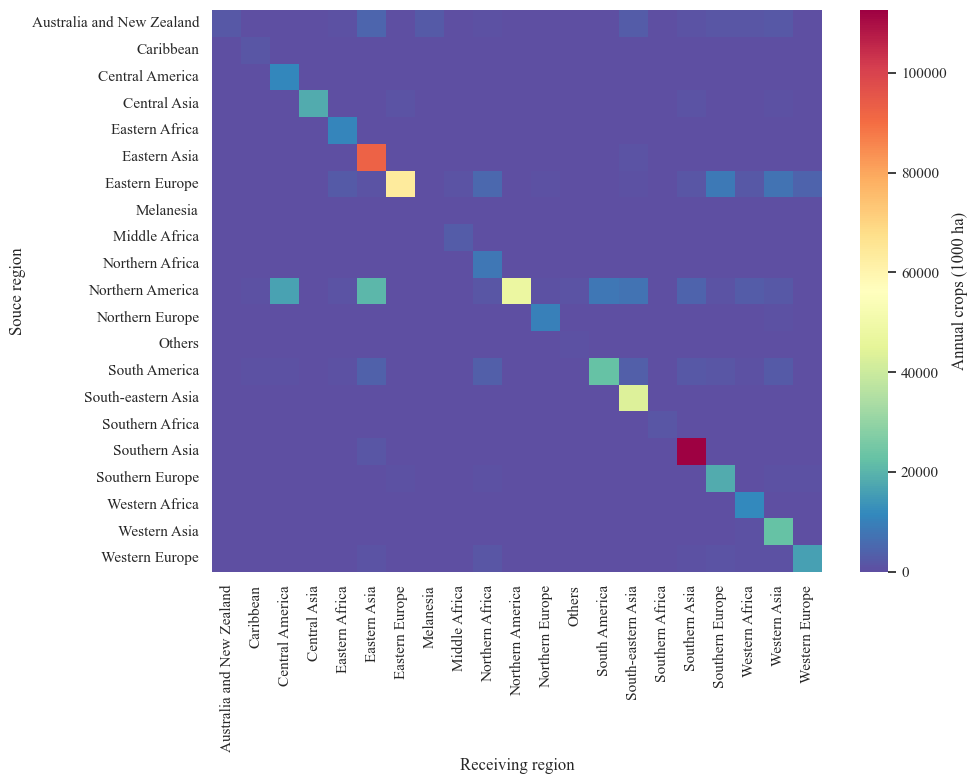

In [39]:
import seaborn as sns
#sns.set_theme(rc={'figure.figsize':(10, 6)})

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.figsize'] = 10, 8

stressor_source_reg.columns.name = 'Receiving region'
stressor_source_reg.index.name = 'Souce region'

sns.heatmap(stressor_source_reg, 
            annot=False, 
            cmap= 'Spectral_r',  #linewidths=0.1,
            cbar_kws={'label': 'Annual crops ({})'.format(io.stressor_source.unit.unit[0])})

plt.tight_layout()
plt.savefig('./Output/Annual_crop_source_regun.png', dpi=500)
plt.show()